# Body Pose Detection using Mediapipe and Bycep Curl Tracker

![byceps curl.png](<attachment:byceps curl.png>)
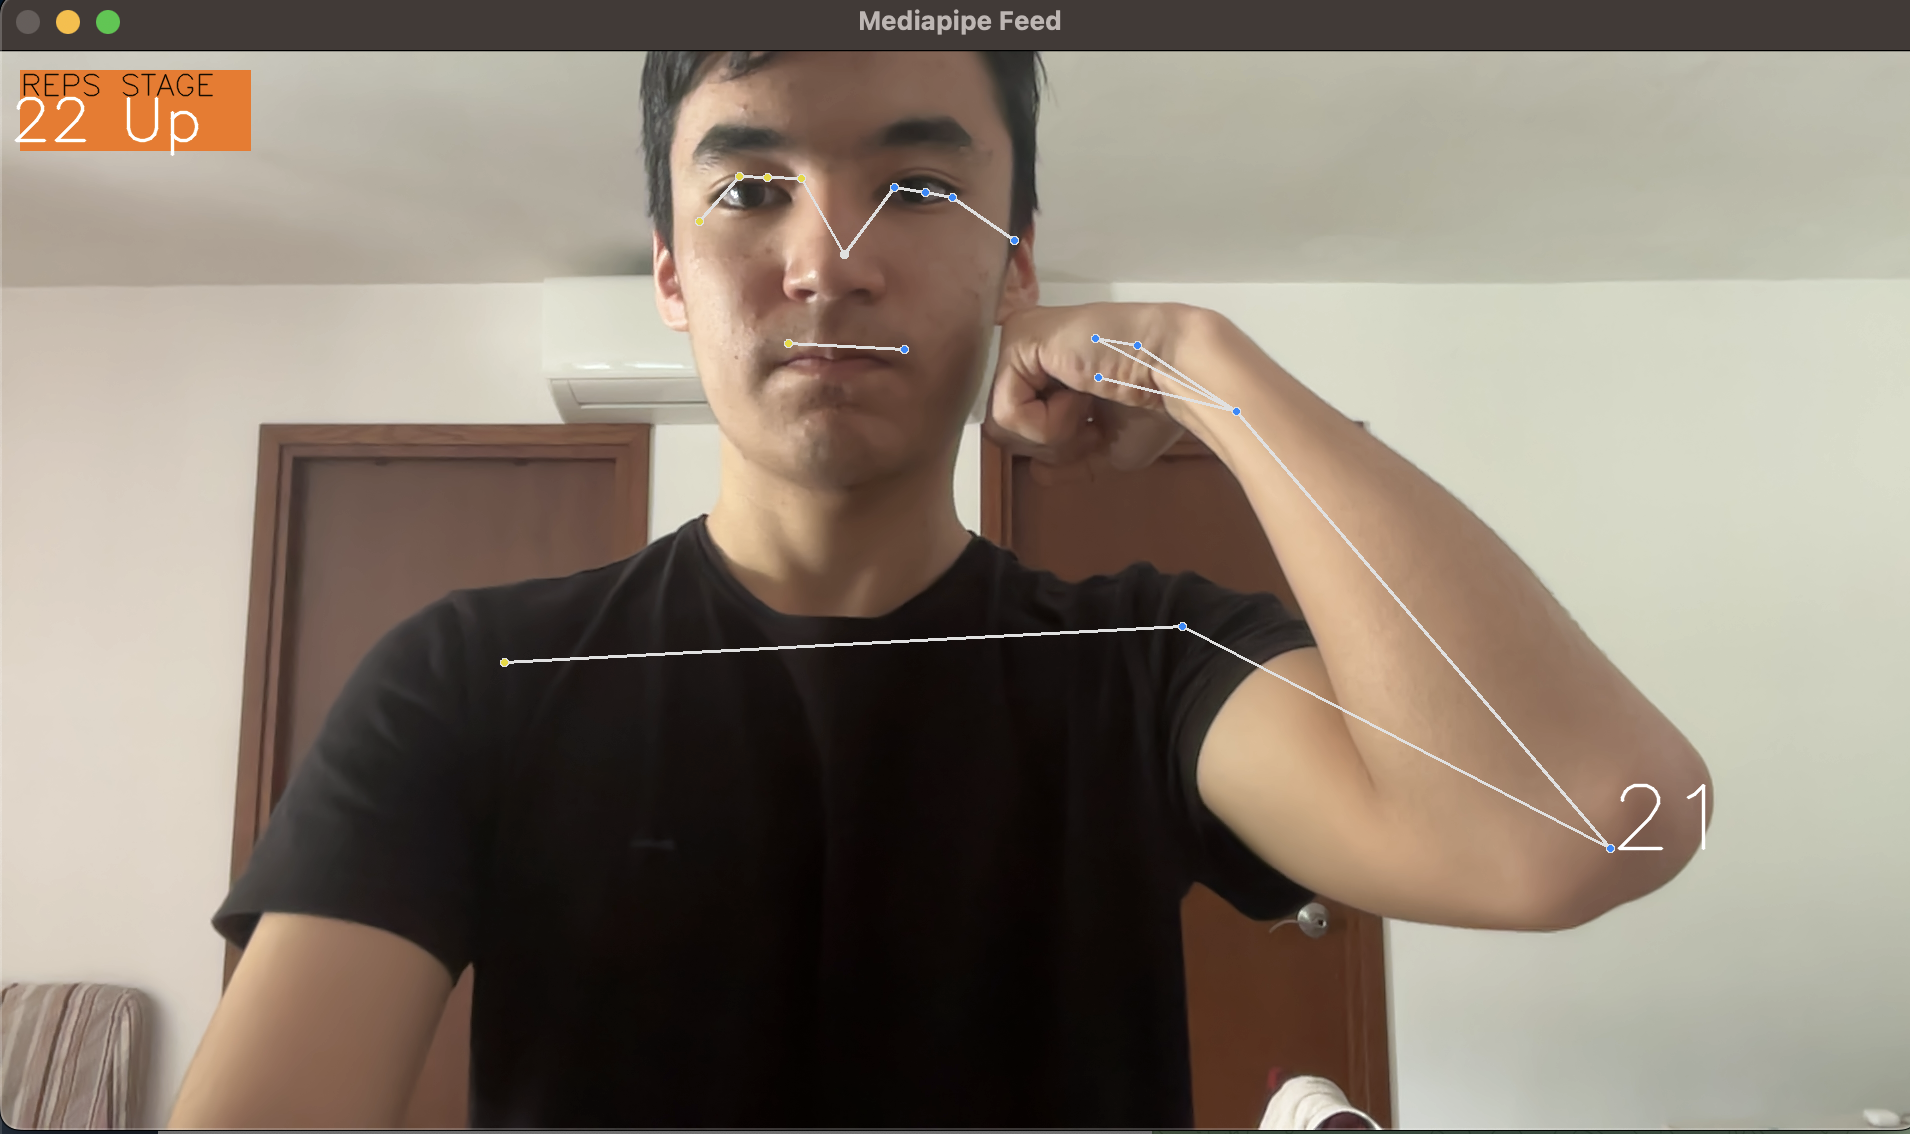

In [90]:
import cv2
import mediapipe as mp
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [91]:
model_path = "/Users/nurdauletnazarbay/Desktop/ML Projects/pose_estimation_media_pipe/pose_landmarker_full.task"

In [92]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [93]:
def calculate_angle(a, b, c):
    A = np.array([a.x, a.y])
    B = np.array([b.x, b.y])
    C = np.array([c.x, c.y])
    
    cos_angle = np.dot(A-B, C-B) / (np.sqrt(np.sum((A-B)** 2)) * np.sqrt(np.sum((C-B) ** 2)))
    radian = np.arccos(cos_angle)
    
    return radian * 180 / (np.pi)

In [94]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

cap = cv2.VideoCapture(0)
with PoseLandmarker.create_from_options(options) as pose:
    count = 0
    stage = None
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
        results = pose.detect(mp_image)

        # Recolor back to BGR
        image.flags.writeable = True
        
        
        try:
            elbow = results.pose_landmarks[0][mp_pose.PoseLandmark.LEFT_ELBOW.value]
            shoulder = results.pose_landmarks[0][mp_pose.PoseLandmark.LEFT_SHOULDER.value]
            wrist = results.pose_landmarks[0][mp_pose.PoseLandmark.LEFT_WRIST.value]
            
            angle = calculate_angle(shoulder, elbow, wrist)
            print(f'{angle} angle ')
            image = cv2.putText(image, str(int(angle)), 
                           tuple(np.multiply([elbow.x, elbow.y], [image.shape[1], image.shape[0]]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            if angle > 160:
                stage = "Down"
            if angle < 30 and stage == "Down":
                stage = "Up"
                count += 1
            
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (20,20), (250,100), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (20, 45), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(count), 
                    (10,90), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (120,45), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (120,90), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        annotated_image = draw_landmarks_on_image(image, results)
        image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                #mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                #mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                # )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

I0000 00:00:1711772480.779761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2


2.5325481640976464 angle 
8.381547663814715 angle 
82.74361712771173 angle 
69.99360988314149 angle 
155.5300550074074 angle 
151.8296982503278 angle 
37.79278293948264 angle 
112.61686585002805 angle 
19.230244352628493 angle 
138.1601608701862 angle 
145.75629179393647 angle 
153.28174183009006 angle 
160.75040810854452 angle 
162.90202125347463 angle 
8.84656172602658 angle 
11.917114659563358 angle 
9.6732423621172 angle 
39.470851087292274 angle 
1.4803844874740344 angle 
133.9572113729252 angle 
6.116584075769964 angle 
2.8452851796771883 angle 
3.4135655430843737 angle 
5.544348959452922 angle 
6.478671851269076 angle 
109.43416210427067 angle 
132.2736699840227 angle 
11.67956609909721 angle 
140.243094592731 angle 
129.7817240468879 angle 
65.36699832698737 angle 
59.99800453914622 angle 
42.448731733349284 angle 
74.95881299785283 angle 
150.67776706124536 angle 
149.78292880728878 angle 
76.82671845648942 angle 
138.58785115024207 angle 
157.8579171034796 angle 
31.408932630

In [72]:
results.pose_world_landmarks

[[Landmark(x=0.004364311695098877, y=-0.520626962184906, z=-0.2620699405670166, visibility=0.999817430973053, presence=0.9991347193717957),
  Landmark(x=0.014338390901684761, y=-0.5602468252182007, z=-0.2543973922729492, visibility=0.9995090961456299, presence=0.9978100657463074),
  Landmark(x=0.014532238245010376, y=-0.5623467564582825, z=-0.2542147636413574, visibility=0.9996285438537598, presence=0.9976966977119446),
  Landmark(x=0.014343136921525002, y=-0.5626775622367859, z=-0.2547929286956787, visibility=0.9995459914207458, presence=0.9971374273300171),
  Landmark(x=-0.012791424989700317, y=-0.554387629032135, z=-0.2496931552886963, visibility=0.9995549321174622, presence=0.9980570673942566),
  Landmark(x=-0.012096280232071877, y=-0.5550593733787537, z=-0.2520468235015869, visibility=0.9996398687362671, presence=0.9980120658874512),
  Landmark(x=-0.012795425951480865, y=-0.5559011101722717, z=-0.25054240226745605, visibility=0.9996160268783569, presence=0.9979755282402039),
  Lan

In [23]:
len(results.pose_landmarks[0])

33